In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
# Read the CSV file into a pandas DataFrame
batting = pd.read_csv('/content/drive/MyDrive/DSA Project/batting_ODI.csv')
bowling = pd.read_csv('/content/drive/MyDrive/DSA Project/bowling_ODI.csv')


In [ ]:
# Combine dataframes of batting and bowling by player name
df = pd.merge(batting, bowling, on='Player', how='inner')

# Replace missing values with zeros
df = df.replace('-', 0)

print(df.head())

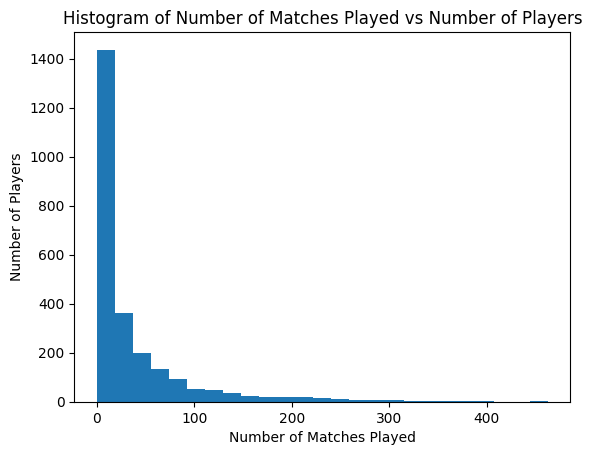


 shape of current data =  (2503, 29)


In [ ]:
# plot number of matches played by players as a histogram

num_matches = df['Mat_x']

# Define the bins to use
num_bins = 25
bin_size = np.max(num_matches) / num_bins
bins = np.arange(0, np.max(num_matches) + bin_size, bin_size)

# Count the number of players in each bin
player_counts, _ = np.histogram(num_matches, bins=bins)

# Create a bar chart of the number of players in each bin
plt.bar(bins[:-1], player_counts, width=bin_size, align='edge')

# Set the axis labels and title
plt.xlabel('Number of Matches Played')
plt.ylabel('Number of Players')
plt.title('Histogram of Number of Matches Played vs Number of Players')

# Display the plot
plt.show()
print("\n shape of current data = ", df.shape)

In [ ]:
# #if want to download
# from google.colab import files
# df.to_csv('combined.csv', index=False)  # Save the dataframe as a CSV file
# files.download('combined.csv')  # Download the CSV file

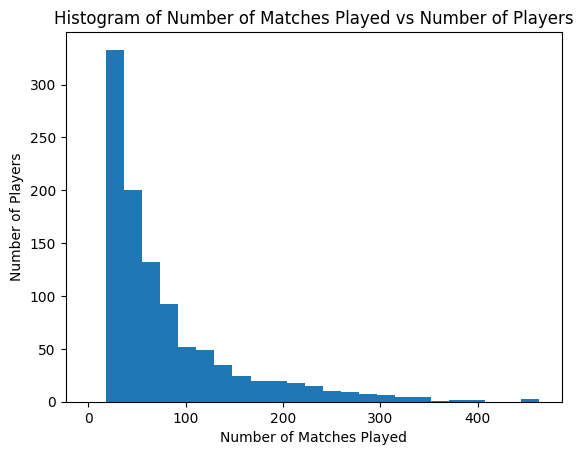


 shape of current data =  (1038, 29)
shape of data after removing player with matches (<= 20) =  (1038, 29)


In [ ]:
# remove players with matches played <=10
norm_df = df[df['Mat_x'] >= 20]

#rename norm_df as df again for convience
df = norm_df

new_num_matches = df['Mat_x']
histplotter(new_num_matches)
print("shape of data after removing player with matches (<= 20) = " , df.shape)

In [ ]:
#convert colums to numeric values
df['Runs_x'] = pd.to_numeric(df['Runs_x'])
df['SR_x'] = pd.to_numeric(df['SR_x'])
df['Wkts'] = pd.to_numeric(df['Wkts'])
df['Econ'] = pd.to_numeric(df['Econ'])

In [ ]:
#select the required features for classification as Economy for bowlers and Strike rate for batsmen
X = df[[ 'SR_x' , 'Econ' ]].values

# Scale the feature vector to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


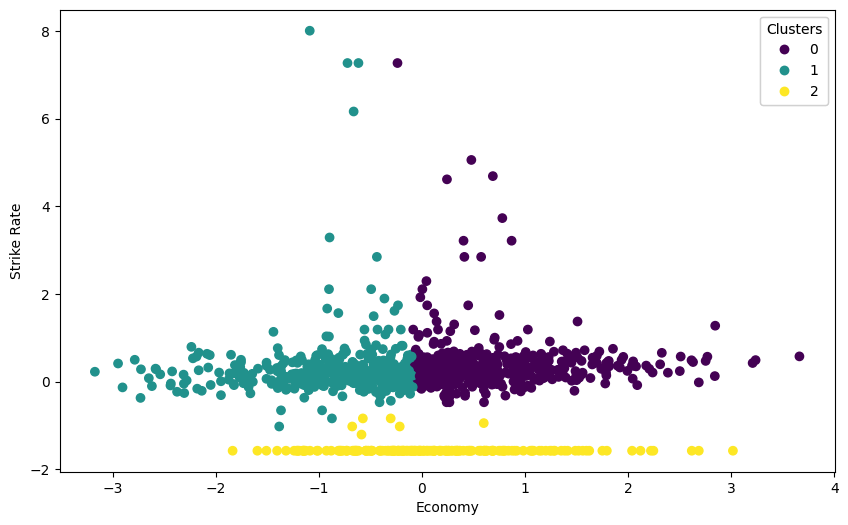

In [ ]:
# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to data
df['Cluster'] = labels

# Visualize the clusters
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
ax.set_xlabel('Economy')
ax.set_ylabel('Strike Rate')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.show()

In [ ]:
# Select the 'Player' and 'Cluster' columns using the loc accessor
player_cluster_df = df.loc[:, ['Player', 'Cluster']]

# Format the table as Markdown and display it
print(player_cluster_df.to_markdown(index=False))

In [ ]:
# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to data
df['Cluster'] = labels



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Replace values in the 'Category' column
df['Cluster'] = df['Cluster'].replace({0: 'Batsman', 1: 'Bowler', 2: 'All-Rounder'})

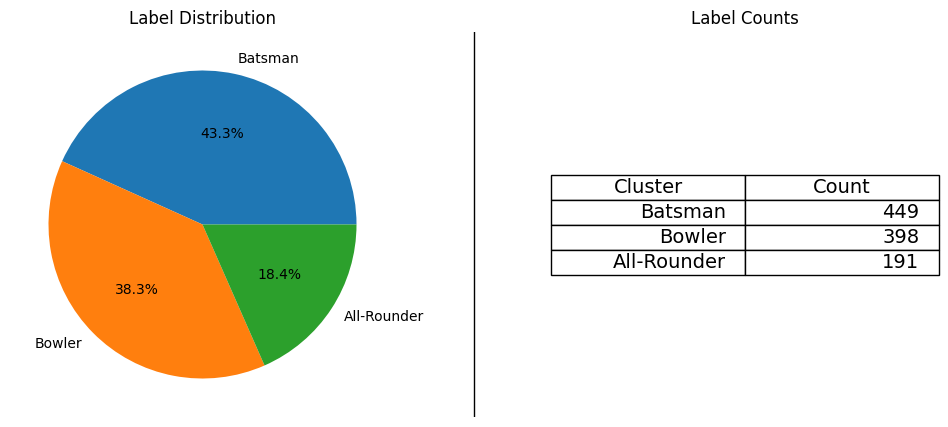

In [ ]:
# Extract the column of interest
labels_col = df['Cluster']

# Compute the counts of each label
counts = labels_col.value_counts()

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,5), gridspec_kw={'width_ratios': [1, 0.25, 1]})

# Create a pie chart of the label counts
ax1.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax1.set_title('Label Distribution')

# Add a boundary subplot containing a vertical line
ax2.axis('off')
ax2.axvline(x=0.5, ymin=0, ymax=1, color='black', linewidth=1)

# Create a table of the label counts
table_data = pd.DataFrame({'Cluster': counts.index, 'Count': counts})
table = ax3.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
table.set_fontsize(14)
table.scale(1, 1.5)
ax3.axis('off')
ax3.set_title('Label Counts')

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.1, hspace=0)

# Display the plot
plt.show()